# Explaratory Data Analysis on Chronic Kidney Disease Datasets

Chronic Kidney Disease (CKD) is a significant public health concern worldwide that affects one in every ten (10) people globally. CKD results from a poorly functioning kidney that fails at the basic functionalities, including removing toxins, waste, and extra fluids from the blood. The build-up of the problematic material in the body can cause complications such as hypertension, anaemia, weak bones, and nerve damage. CKD often occurs in individuals that suffer from additional chronic illnesses such as diabetes, heart disease, and hypertension, in addition to the existence of unfavourable health habits and practices that lead to the kidney's deplorable state. The presence of additional illnesses that occur in tandem with CKD causes a hindrance in its successful and early detection. 

The onset of CKD can be clinically detected using laboratory tests focusing on specific standard parameters such as the Glomerular Filtration Rate (GFR) and the albumin-creatinine ratio. Kidney damage occurs in stages, with each subsequent stage indicating a severe reduction in the glomerular filtration rate. The GFR parameter is considered a facet of the indication of renal failure and the final stage of chronic kidney disease. It is then imperative to use early detection methods to assist in the early administration of treatment to alleviate the symptoms of the disease and combat the progression. Early-stage diagnosis involves medications, diet adjustments and invasive procedures. 

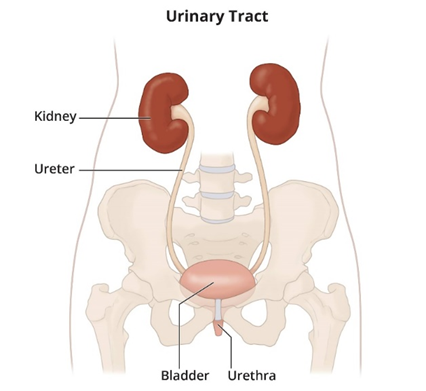

In developing countries, especially in Africa, the prevalence of CKD is estimated at 3 – 4 times more than in developed countries in Europe, America and Asia. The current dialysis treatment rate in South Africa stands at approximately 70 per-million population (pmp), and the transplant rate stands at approximately 9.2 per-million population (pmp). The accounted prevalence rate mainly considers individuals with accessibility to private health care options through affordability or medical insurance; however, most South Africans (approximately 84%) depend on the under-resourced, government-funded public health systems. The disparity in treatment affordability among South Africans of different economic classes introduces a two-tiered health system that affects access to quality treatments. The need for early detection and diagnosis is an important process in the field of CKD and other chronic illnesses plaguing the nation using machine learning algorithms. 

Machine learning applications in the health care sector aim to revolutionise the early detection and treatment of chronic illness for the greater global population. Since early detection and management are vital in preventing disease progression and reducing the risk of complications, some machine learning (ML) models have been developed to detect CKD. 

Three datasets will be explored in this notebook before individually scrutinized and various machine learning algorithms will be employed to determine the prediction rate of the disease. The three datasets include:- two UCI Machine Learning Repository datasets Chronic Kidney Disease and Risk Factor prediction of Chronic Kidney Disease; and the PLOS ONE dataset Chronic kidney disease in patients at high risk of cardiovascular disease in the United Arab Emirates: A population-based study. 

### EDA - Exploratory Analysis

EDA represents the foundational step. It entails a systematic process of investigating a dataset to gain insights into its structure, central tendencies, potential relationships, and anomalies.  Through EDA a combination of statistical summaries and data visualization techniques are used to illuminate characteristics within the dataset to provide some explainability and identify patterns that may be relevant.

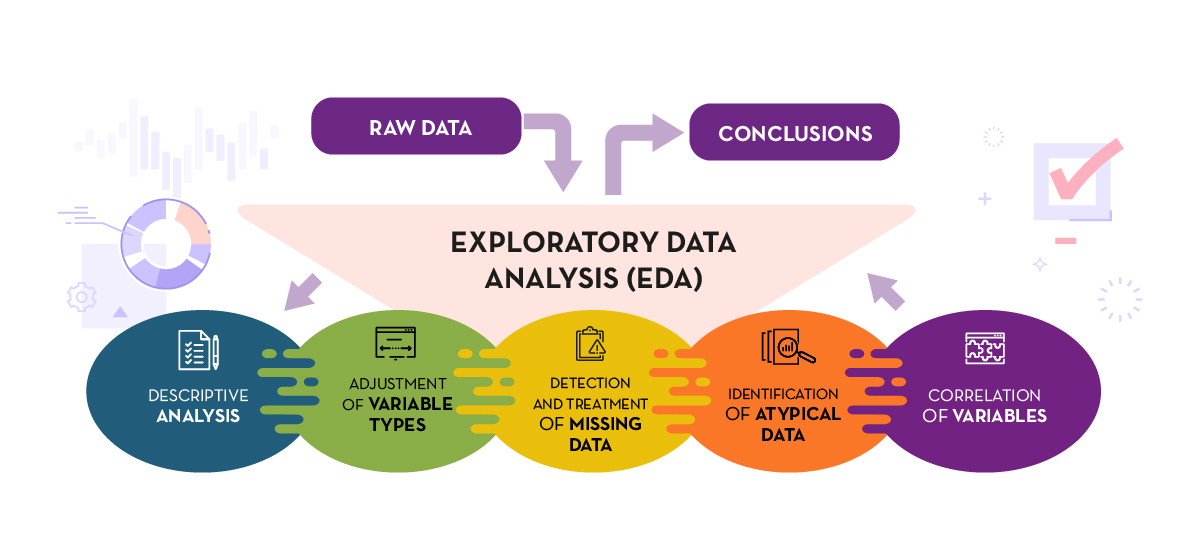

## Environment Setup

In [1]:
# Data manupilation
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
from scipy.io import arff
from sklearn import preprocessing
from numpy import mean

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For filtering the warnings
import warnings
warnings.filterwarnings('ignore')

### Focus: Dataset 1

The first dataset is the Chronic Kidney Disease dataset submitted by Dr P. Soundarapandian, a senior consultant nephrologist from Apollo Hospitals in India and created by the research scholar L. Jerlin Rubini of the Alagappa University in India. The dataset contains four hundred (400) patient observations and twenty-five attributes. 

In [45]:
# load the dataset with pandas read_csv function
df1 = pd.read_csv(r"C:\Users\vanes\OneDrive\Desktop\Personal Projects\Portfolio Projects\Data Science\Healthcare\Healthcare\ckd\India Dataset\kidney_disease.csv", index_col="id")

df1.head(10).transpose()

id,0,1,2,3,4,5,6,7,8,9
age,48.0,7.0,62.0,48.0,51.0,60.0,68.0,24.0,52.0,53.0
bp,80.0,50.0,80.0,70.0,80.0,90.0,70.0,NaN,100.0,90.0
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
al,1.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,3.0,2.0
su,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal
pc,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121.0,NaN,423.0,117.0,106.0,74.0,100.0,410.0,138.0,70.0


In [46]:
# To understand the shape of the dataset as in number of rows and columns
df1.shape

(400, 25)

We can confirm that there are 400 observations and 25 attributes in the dataset. 

In [47]:
# Edit the column names for easier readability
df1.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

# Then to obtain a concise summary
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

Building upon this summary and our current understanding of the dataset, we can glean the following key characteristics:

1. The dataset comprises 24 independent features, acting as predictors, and a single binary dependent feature signifying chronic kidney disease (CKD) status for each observation. This dependent feature is categorical, with labels like "ckd" and "not ckd".
2. The presence of missing data points across all independent features is acknowledged. Further investigation is required to determine the extent and distribution of these missing values.
3. The features are categorized as either float (numerical) or object (categorical). This translates to a breakdown of 11 numerical and 14 categorical variables, including the target feature (CKD status).

Now its to further investigate each of these features and clean the data where necessary.

### Handling Data Quality Issues and Further Exploration

In [48]:
# Firstly, the removal of the index id column
df1.reset_index(drop = True).head(10).transpose() 

,0,1,2,3,4,5,6,7,8,9
age,48.0,7.0,62.0,48.0,51.0,60.0,68.0,24.0,52.0,53.0
blood_pressure,80.0,50.0,80.0,70.0,80.0,90.0,70.0,NaN,100.0,90.0
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,3.0,2.0
sugar,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
blood_glucose_random,121.0,NaN,423.0,117.0,106.0,74.0,100.0,410.0,138.0,70.0


In [49]:
# Next, we investgigate the extent at which there are missing values in the dataset as a percentage.
df1.isnull().sum() / df1.shape[0] * 100.00

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.50
white_blood_cell_count     26.25
red_blood_cell_count       32.50
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

Columns with missing data greater than 25% are considered to have a significant extent of missing information in the dataset. These variables included red blood cells, white blood cell count and red blood cell count. The missing data can be dealt with in the following three different ways;

1. All the rows with missing data can be eliminated
2. All the columns with a lot of missing data can be eliminated
3. The missing data can be replaced through various imputation ways either replacing the values with mean, median or mode or using k-nearest neighbour to replace the data values with similar computed values based on similarity and nearness.

This will be handled later when pre-processing the data for later steps.

Carefully considering the categorical and numerical columns of the dataset. The first thing to understand is the type of information under each feature and any unique values present. This would show a somewhat detail of the composition of the data points under each variable. This would eventually be visually shown for easier understanding and readability.

In [50]:
def extract_cat_num(data):
    categorical_col = [col for col in data.columns if data[col].dtype == 'object']
    numerical_col = [col for col in data.columns if data[col].dtype == 'float64']
    return categorical_col,numerical_col

In [51]:
# Now we separate the categorical and numerical columns
categorical_col, numerical_col = extract_cat_num(df1)

In [52]:
# The categorical columns
categorical_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [53]:
# To get an understanding of the categorical columns, we can take a closer look at the unique values under each feature
for col in categorical_col:
    print('\nUnique Values in {} has\n{} '.format(col,df1[col].value_counts()))
    print('\n')


Unique Values in red_blood_cells has
normal      201
abnormal     47
Name: red_blood_cells, dtype: int64 



Unique Values in pus_cell has
normal      259
abnormal     76
Name: pus_cell, dtype: int64 



Unique Values in pus_cell_clumps has
notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64 



Unique Values in bacteria has
notpresent    374
present        22
Name: bacteria, dtype: int64 



Unique Values in packed_cell_volume has
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: packed_cell_volume, dtype: int64 



Unique Values in

In [54]:
# The numerical columns
numerical_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin']

Attributes such as packed cell volume, white blood cell count, diabetes mellitus, coronary artery disease, and class contained values with additional symbols and spaces, which resulted in these values possibly viewed as characters instead of numerical and categorical data types. These issues are assumed to be human errors, which could be the result of a data entry mistake. 

Some of the variables, such as packed cell volume, white blood cell count and red blood cell count have been considered as objects although they are numerical and contain values that are not numbers. This prompts a conversion of these data types and values.

The same can be seen for the categorical values such as diabetes mellitus that has four unique values of 'no', 'yes', '\tno', '\tyes' and ' yes'. These values can also be converted to satisfy their true meaning.

This is corrected below.

In [55]:
df1['packed_cell_volume'] = df1['packed_cell_volume'].replace(["\t43"],[43])
df1['white_blood_cell_count'] = df1['white_blood_cell_count'].replace(["\t6200","\t8400"],[6200,8400])

In [56]:
# categorical features to be converted to numerical recognizable features with the 'NaN' or 'other' previously unrecognizable non-numerical data points are coerced to not a number (NaN) as recognized by the environment
# creating a function to serve that purpose
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce') 

features_to_be_num = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in features_to_be_num:
    convert_dtype(df1,i)

In [57]:
df1['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df1['coronary_artery_disease'] = df1['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df1['class'] = df1['class'].replace(to_replace = 'ckd\t', value = 'ckd')

df1['class'] = df1['class'].replace(to_replace = 'notckd', value = 'not ckd')

In [58]:
for col in categorical_col:
    print('\nUnique Values in {} has\n{} '.format(col,df1[col].value_counts()))
    print('\n')


Unique Values in red_blood_cells has
normal      201
abnormal     47
Name: red_blood_cells, dtype: int64 



Unique Values in pus_cell has
normal      259
abnormal     76
Name: pus_cell, dtype: int64 



Unique Values in pus_cell_clumps has
notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64 



Unique Values in bacteria has
notpresent    374
present        22
Name: bacteria, dtype: int64 



Unique Values in packed_cell_volume has
41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
34.0    11
37.0    11
30.0     9
29.0     9
35.0     9
46.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
27.0     3
22.0     3
19.0     2
23.0     2
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
16.0     1
Name: packed_cell_volume, dtype: int64 



Unique Values in white_blood_cell_coun

### Focus: Dataset 2

The second dataset is from a study titled ‘Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms’, which contains two hundred and two (202) patient observations and twenty-nine (29) attributes. It was submitted by Nayeem Ahmed, a Medical Administrative at Enam Medical College in Bangladesh and created by Diu Journal Analytica R & D Lab Md research scholar Ashiqul Islam in Bangladesh. 

### Focus: Dataset 3

The third and final dataset is from a study conducted by Al-Shamsi et al. (2018) titled ‘Chronic kidney disease in patients at high risk of cardiovascular disease in the United Arab Emirates: A population-based study’, from a hospital in Al Ain, United Arab Emirates, called Tawam Hospital, which contains four hundred and ninety-one (491) patient observations and twenty-five (25) attributes.